In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import Cdf
import numpy as np

In [2]:
with sqlite3.connect('../data/loc-res.db') as conn:
    do53_local = pd.read_sql('select * from do53_5pct', con=conn)
    dot_local = pd.read_sql('select * from dot_5pct', con=conn)

In [26]:
with sqlite3.connect('../data/loc-res.db') as conn:
    dot_loc_median = pd.read_sql('select * from dot_median', con=conn)
with sqlite3.connect('../data/pub-res.db') as conn:
    dot_pub_median = pd.read_sql('select * from dot_median', con=conn)

In [29]:
dot_median = dot_loc_median.append(dot_pub_median)

In [31]:
dot_median['rt'].median()

200.7145

In [3]:
do53_local['resolver_name'] = 'Local Resolver'

In [4]:
dot_local['resolver_name'] = 'Local Resolver'

In [5]:
do53_local = do53_local[['prb_id', 'country_code', 'continent_code', 'resolver_name', 'rt']]
dot_local = dot_local[['prb_id', 'country_code', 'continent_code', 'resolver_name', 'rt']]

In [6]:
do53_local

,prb_id,country_code,continent_code,resolver_name,rt
0,10007,US,NA,Local Resolver,14.16090
1,10080,JP,AS,Local Resolver,5.49085
2,10087,PL,EU,Local Resolver,23.06465
3,10095,NZ,OC,Local Resolver,20.42100
4,10098,GB,EU,Local Resolver,8.65400
...,...,...,...,...,...
2713,35699,SE,EU,Local Resolver,5.06700
2714,35701,US,NA,Local Resolver,53.92800
2715,35719,NL,EU,Local Resolver,16.14040
2716,35723,KZ,AS,Local Resolver,12.99740


In [7]:
dot_local

,prb_id,country_code,continent_code,resolver_name,rt
0,10342,US,NA,Local Resolver,104.00170
1,14377,DE,EU,Local Resolver,191.90675
2,16233,NL,EU,Local Resolver,148.06850
3,17525,FR,EU,Local Resolver,122.72300
4,17609,SE,EU,Local Resolver,66.42740
5,18275,US,NA,Local Resolver,383.77400
6,20324,NL,EU,Local Resolver,156.55865
7,22890,NL,EU,Local Resolver,146.84850
8,23214,SE,EU,Local Resolver,117.80155
9,29989,NL,EU,Local Resolver,145.90230


In [8]:
with sqlite3.connect('../data/pub-res.db') as conn:
    do53_pub = pd.read_sql('select * from do53_5pct', con=conn)
    dot_pub = pd.read_sql('select * from dot_5pct', con=conn)

In [9]:
do53_pub

,prb_id,country_code,continent_code,resolver_name,rt
0,10006,GB,EU,CZ.NIC ODVR,50.22660
1,10006,GB,EU,CleanBrowsing,22.13310
2,10006,GB,EU,Cloudflare 1.1.1.1,19.16870
3,10006,GB,EU,Comodo Secure DNS,26.33950
4,10006,GB,EU,DNS.WATCH,31.75100
...,...,...,...,...,...
43795,35742,ZA,AF,Quad9,2.29200
43796,35742,ZA,AF,SafeDNS,12.11000
43797,35742,ZA,AF,UncensoredDNS,196.55605
43798,35742,ZA,AF,VeriSign Public DNS,190.77650


In [10]:
dot_pub

,prb_id,country_code,continent_code,resolver_name,rt
0,10006,GB,EU,CleanBrowsing,297.26800
1,10006,GB,EU,Cloudflare 1.1.1.1,164.38140
2,10006,GB,EU,Google Public DNS,155.04670
3,10006,GB,EU,Quad9,177.32480
4,10006,GB,EU,UncensoredDNS,958.34600
...,...,...,...,...,...
14666,35724,KR,AS,UncensoredDNS,1343.76425
14667,35742,ZA,AF,CleanBrowsing,1258.35970
14668,35742,ZA,AF,Cloudflare 1.1.1.1,96.99155
14669,35742,ZA,AF,Google Public DNS,279.46590


In [11]:
do53 = do53_local.append(do53_pub)

In [12]:
do53

,prb_id,country_code,continent_code,resolver_name,rt
0,10007,US,NA,Local Resolver,14.16090
1,10080,JP,AS,Local Resolver,5.49085
2,10087,PL,EU,Local Resolver,23.06465
3,10095,NZ,OC,Local Resolver,20.42100
4,10098,GB,EU,Local Resolver,8.65400
...,...,...,...,...,...
43795,35742,ZA,AF,Quad9,2.29200
43796,35742,ZA,AF,SafeDNS,12.11000
43797,35742,ZA,AF,UncensoredDNS,196.55605
43798,35742,ZA,AF,VeriSign Public DNS,190.77650


In [13]:
dot = dot_local.append(dot_pub)

In [14]:
dot

,prb_id,country_code,continent_code,resolver_name,rt
0,10342,US,NA,Local Resolver,104.00170
1,14377,DE,EU,Local Resolver,191.90675
2,16233,NL,EU,Local Resolver,148.06850
3,17525,FR,EU,Local Resolver,122.72300
4,17609,SE,EU,Local Resolver,66.42740
...,...,...,...,...,...
14666,35724,KR,AS,UncensoredDNS,1343.76425
14667,35742,ZA,AF,CleanBrowsing,1258.35970
14668,35742,ZA,AF,Cloudflare 1.1.1.1,96.99155
14669,35742,ZA,AF,Google Public DNS,279.46590


In [15]:
len(dot['prb_id'].unique())

3038

In [16]:
len(do53['prb_id'].unique())

3148

In [17]:
name = "tab20"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

In [18]:
color_dict = dict()
for res, col in zip(do53['resolver_name'].unique(), colors):
    color_dict[res] = col

In [19]:
color_dict

{'Local Resolver': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'CZ.NIC ODVR': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'CleanBrowsing': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Cloudflare 1.1.1.1': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Comodo Secure DNS': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'DNS.WATCH': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Google Public DNS': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392),
 'OpenDNS': (1.0, 0.596078431372549, 0.5882352941176471),
 'OpenNIC': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'Oracle + Dyn': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Quad9': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'SafeDNS': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'UncensoredDNS': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'VeriS

In [20]:
markers = {  'CleanBrowsing' : 'o',
             'Cloudflare 1.1.1.1' : 'v',
             'Comodo Secure DNS' : '^',
             'CZ.NIC ODVR' : '<',
             'Oracle + Dyn' : '>',
             'DNS.WATCH' : 's',
             'Google Public DNS' : 'p',
             'Neustar UltraRecursive' : 'h',
             'OpenDNS' : 'd',
             'OpenNIC' : '*',
             'Quad9' : '1',
             'SafeDNS' : '2',
             'UncensoredDNS' : '3',
             'VeriSign Public DNS' : '4',
             'Yandex.DNS' : 'x',
             'Local Resolver' : 'D'
         }

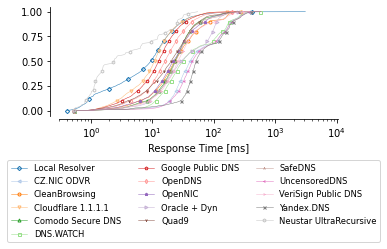

In [21]:
with open('cdfs/cdf-response-time-overall-Do53-percentiles.csv', 'w+') as f:

    fig, ax = plt.subplots(figsize=(5,2))

    # one line for each resolver
    for res in do53['resolver_name'].unique():
        cdf = Cdf.MakeCdfFromList(do53[do53['resolver_name'] == res]['rt'])
        ax.plot(cdf.xs, cdf.ps, label=res,
                linestyle='-', linewidth=0.5, color=color_dict[res],
                marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
               )

        # write CDF to CSV 
        skip = max(1, int(len(cdf.xs)/150))
        f.write('--- %s ---\n' % (res))
        for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
            f.write('%.2f \t %.5f\n' % (x, p))
        f.write('\n===========================\n\n')

    ax.set_title('')
    ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(-0.2, -1.2), fontsize='small')
    ax.set_xscale('log')
    ax.set_xlabel('Response Time [ms]')

    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))
    
    ax.set_xlim([0.3, 10500])

#     fig.savefig('../plots/cdf-response-time-Do53-overall.pdf', bbox_inches='tight')


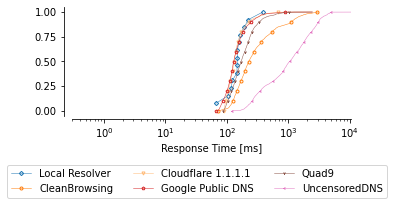

In [22]:
with open('cdfs/cdf-response-time-overall-DoT-percentiles.csv', 'w+') as f:
    
    fig, ax = plt.subplots(figsize=(5,2))

    # one line for each resolver
    for res in dot['resolver_name'].unique():
        cdf = Cdf.MakeCdfFromList(dot[dot['resolver_name'] == res]['rt'])
        ax.plot(cdf.xs, cdf.ps, label=res,
                linestyle='-', linewidth=0.5, color=color_dict[res],
                marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
               )

        # write CDF to CSV 
        skip = max(1, int(len(cdf.xs)/150))
        f.write('--- %s ---\n' % (res))
        for x, p in list(zip(cdf.xs, cdf.ps))[::skip]:
            f.write('%.2f \t %.5f\n' % (x, p))
        f.write('\n===========================\n\n')



    ax.set_title('')
    ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(-0.25, -0.8))
    ax.set_xscale('log')
    ax.set_xlabel('Response Time [ms]')

    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))
    
    ax.set_xlim([0.3, 10500])

#     fig.savefig('../plots/cdf-response-time-DoT-overall.pdf', bbox_inches='tight')


In [23]:
min(do53_pub['rt'].min(), dot_pub['rt'].min())

0.529

In [24]:
max(do53_pub['rt'].max(), dot_pub['rt'].max())

16739.958

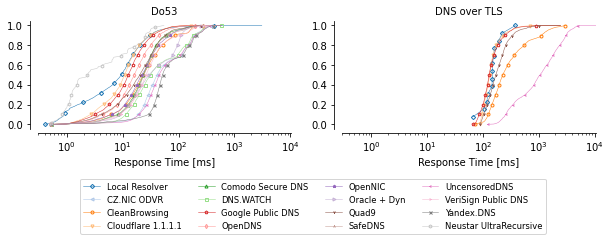

In [25]:
fig, (ax_1, ax_2) = plt.subplots(figsize=(10,2), ncols=2)

# one line for each resolver
for res in do53['resolver_name'].unique():
    cdf = Cdf.MakeCdfFromList(do53[do53['resolver_name'] == res]['rt'])
    ax_1.plot(cdf.xs, cdf.ps, label=res,
              linestyle='-', linewidth=0.5, color=color_dict[res],
              marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
             )

for res in dot['resolver_name'].unique():
    cdf = Cdf.MakeCdfFromList(dot[dot['resolver_name'] == res]['rt'])
    ax_2.plot(cdf.xs, cdf.ps, label=res,
              linestyle='-', linewidth=0.5, color=color_dict[res],
              marker=markers[res], markersize=3, fillstyle='none', markevery=max(1, int(len(cdf.xs)/10))
             )

for ax in [ax_1, ax_2]:
    ax.set_title('')
    ax.set_xscale('log')

    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.03))
    ax.spines['left'].set_position(('axes', -0.03))
    
    ax.set_yticks(np.arange(0, 1.1, 0.2))

    ax.set_xlim([0.3, 10500])

    
ax_1.set_title('Do53', fontsize=10)
ax_2.set_title('DNS over TLS', fontsize=10)

ax_1.legend(loc='lower left', ncol=4, bbox_to_anchor=(0.15, -1), fontsize='small')

ax_1.set_xlabel('Response Time [ms]')
ax_2.set_xlabel('Response Time [ms]')

fig.savefig('../plots/cdf-response-time-overall.pdf', bbox_inches='tight')